# Machine Learning - Formação Cientista de dados
### Ensamble Learning
Aprendizado em grupo, onde o algoritmo cria várias arvores de decisões e busca a melhor performance entre a combinação dos modelos

In [1]:
install.packages("randomForest", dependencies=T)

Installing package into 'C:/Users/dmiyake/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dmiyake\AppData\Local\Temp\RtmpC6ndkt\downloaded_packages


In [4]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [5]:
credito = read.csv(file.choose(), sep = ',', header=T) #arquivo credit.csv

In [6]:
summary(credito)

      checking_status    duration                             credit_history
 'no checking':394    Min.   : 4.0   'all paid'                      : 49   
 <0           :274    1st Qu.:12.0   'critical/other existing credit':293   
 >=200        : 63    Median :18.0   'delayed previously'            : 88   
 0<=X<200     :269    Mean   :20.9   'existing paid'                 :530   
                      3rd Qu.:24.0   'no credits/all paid'           : 40   
                      Max.   :72.0                                          
                                                                            
                purpose    credit_amount              savings_status
 radio/tv           :280   Min.   :  250   'no known savings':183   
 'new car'          :234   1st Qu.: 1366   <100              :603   
 furniture/equipment:181   Median : 2320   >=1000            : 48   
 'used car'         :103   Mean   : 3271   100<=X<500        :103   
 business           : 97   3rd Qu.: 397

In [4]:
amostra = sample(2,1000, replace = T, prob= c(0.7, 0.3))
creditotreino = credito[amostra==1,]
creditoteste = credito[amostra==2,]

In [5]:
#floresta = randomForest (class ~. (classe e atributos), data=creditotreino (dado a ser pego), ntree = 100 (numero de arvores envolvidas), importance = T)
floresta = randomForest (class ~., data=creditotreino, ntree = 100, importance = T)

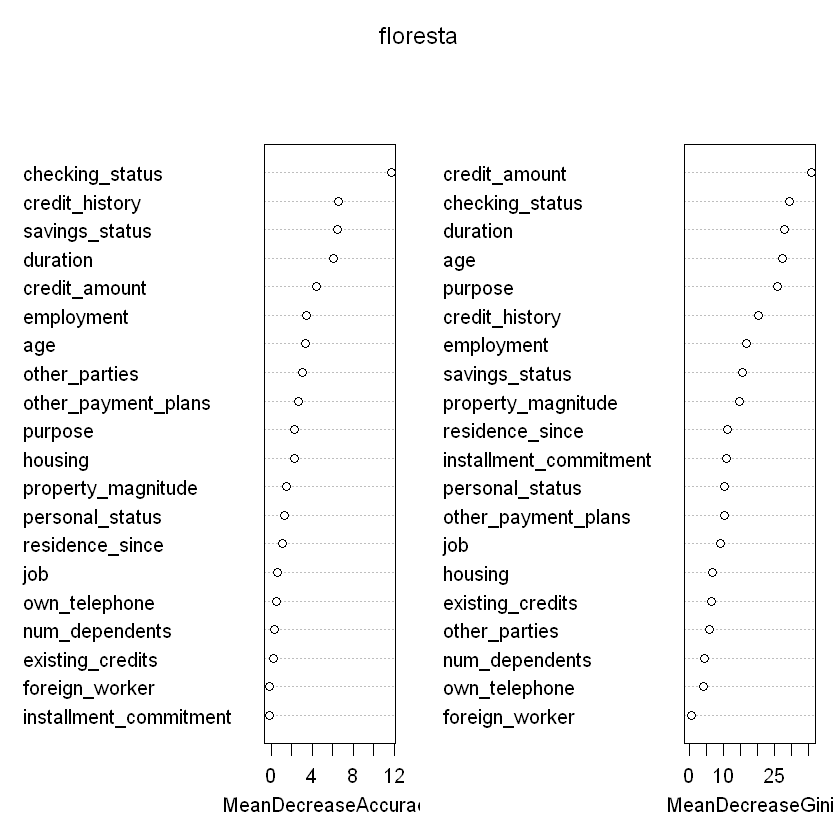

In [6]:
varImpPlot (floresta)

In [ ]:
#meanDecreaseAccuracy = quanto pior o modelo ficaria sem o atributo
#meanDecreaseGini = indice gini para testar a pureza dos nós da árvore

In [7]:
previsao = predict(floresta, creditoteste)

In [9]:
confusao = table(previsao,creditoteste$class)

In [10]:
confusao

        
previsao bad good
    bad   37   12
    good  53  178

In [11]:
taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)

In [12]:
taxaacerto

[1] 0.7678571

In [13]:
taxaerro = (confusao[2] + confusao[3]) / sum(confusao)

In [14]:
taxaerro

[1] 0.2321429

## Conclusão indices maiores com os mesmos dados